### **Gram-Schmidt process**

It takes a list of vectors and forms an orthonormal basis from this set. 
As a corollary, the procedure allows us to determine the dimension of the space spanned by the basis vectors, which is equal to or less than the space which the vectors sit.

In [1]:
import numpy as np
import numpy.linalg as la

verySmallNumber = 1e-14 # That's 1×10⁻¹⁴ = 0.00000000000001

def norm_or_zero(A, col):
    if la.norm(A[:, col]) > verySmallNumber :
        A[:, col] = A[:, col] / la.norm(A[:, col])
    else :
        A[:, col] = np.zeros_like(A[:, col])

# Our first function will perform the Gram-Schmidt procedure for 4 basis vectors.
# We'll take this list of vectors as the columns of a matrix, A.
# We'll then go through the vectors one at a time and set them to be orthogonal
# to all the vectors that came before it. Before normalising.



def gsBasis4(A) :
    # Make B as a copy of A, since we're going to alter it's values.
    B = np.array(A, dtype=np.float_) 

    # The zeroth column is easy, since it has no other vectors to make it normal to.
    # All that needs to be done is to normalise it. I.e. divide by its modulus, or norm.
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])


    # For the first column, we need to subtract any overlap with our new zeroth vector.
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]


    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
    norm_or_zero(B, 1)


    # Now we need to repeat the process for column 2.
    # Insert two lines of code, the first to subtract the overlap with the zeroth vector,
    # and the second to subtract the overlap with the first.
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 0] * B[:, 0]
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 1] * B[:, 1]
    


    # Again we'll need to normalise our new vector.
    # Copy and adapt the normalisation fragment from above to column 2.
    norm_or_zero(B, 2)
    
    # Finally, column three:
    # Insert code to subtract the overlap with the first three vectors.
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 0] * B[:, 0]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 1] * B[:, 1]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 2] * B[:, 2]
    
    # Now normalise if possible
    norm_or_zero(B, 3)
    
    # Finally, we return the result:
    return B




def gsBasis(A) :
    B = np.array(A, dtype=np.float_)
    
    for i in range(B.shape[1]) :
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i) :
            B[:, i] = B[:, i] - B[:, i] @ B[:, j] * B[:, j]
        norm_or_zero(B, i)
             
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(la.norm(gsBasis(A), axis=0))

Some testing

In [2]:

V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)
gsBasis4(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [3]:
U = gsBasis4(V)
gsBasis4(U)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [4]:
gsBasis(V)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [5]:
A = np.array([[3,2,3],
              [2,5,-1],
              [2,4,8],
              [12,2,1]], dtype=np.float_)
gsBasis(A)

array([[ 0.23643312,  0.18771349,  0.22132104],
       [ 0.15762208,  0.74769023, -0.64395812],
       [ 0.15762208,  0.57790444,  0.72904263],
       [ 0.94573249, -0.26786082, -0.06951101]])

In [6]:
dimensions(A)

3.0

In [7]:
B = np.array([[6,2,1,7,5],
              [2,8,5,-4,1],
              [1,-6,3,2,8]], dtype=np.float_)
gsBasis(B)

array([[ 0.93704257, -0.12700832, -0.32530002,  0.        ,  0.        ],
       [ 0.31234752,  0.72140727,  0.61807005,  0.        ,  0.        ],
       [ 0.15617376, -0.6807646 ,  0.71566005,  0.        ,  0.        ]])

In [8]:
dimensions(B)

3.0

In [9]:
# Now let's see what happens when we have one vector that is a linear combination of the others.
C = np.array([[1,0,2],
              [0,1,-3],
              [1,0,2]], dtype=np.float_)
gsBasis(C)

array([[0.70710678, 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.70710678, 0.        , 0.        ]])

In [10]:

dimensions(C)

2.0

### **Identifying special matrices**

In [11]:
import numpy as np

# Our function will go through the matrix replacing each row in order turning it into echelon form.
# If at any point it fails because it can't put a 1 in the leading diagonal,
# we will return the value True, otherwise, we will return False.



def isSingular(A) :
    B = np.array(A, dtype=np.float_) 
    try:
        fixRowZero(B)
        fixRowOne(B)
        fixRowTwo(B)
        fixRowThree(B)
    except MatrixIsSingular:
        return True
    return False


class MatrixIsSingular(Exception): pass


# For Row Zero, all we require is the first element is equal to 1.
# We'll divide the row by the value of A[0, 0].
# This will get us in trouble though if A[0, 0] equals 0, so first we'll test for that,
# and if this is true, we'll add one of the lower rows to the first one before the division.
# We'll repeat the test going down each lower row until we can do the division.
def fixRowZero(A) :
    if A[0,0] == 0 :
        A[0] = A[0] + A[1]
    if A[0,0] == 0 :
        A[0] = A[0] + A[2]
    if A[0,0] == 0 :
        A[0] = A[0] + A[3]
    if A[0,0] == 0 :
        raise MatrixIsSingular()
    A[0] = A[0] / A[0,0]
    return A

# First we'll set the sub-diagonal elements to zero, i.e. A[1,0].
# Next we want the diagonal element to be equal to one.
# We'll divide the row by the value of A[1, 1].
# Again, we need to test if this is zero.
# If so, we'll add a lower row and repeat setting the sub-diagonal elements to zero.
def fixRowOne(A) :
    A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        A[1] = A[1] + A[2]
        A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        A[1] = A[1] + A[3]
        A[1] = A[1] - A[1,0] * A[0]
    if A[1,1] == 0 :
        raise MatrixIsSingular()
    A[1] = A[1] / A[1,1]
    return A


def fixRowTwo(A) :
    # Insert code below to set the sub-diagonal elements of row two to zero (there are two of them).
    A[2] = A[2] - A[2,0] * A[0]
    A[2] = A[2] - A[2,1] * A[1]
    
    # Next we'll test that the diagonal element is not zero.
    if A[2,2] == 0 :
        # adds a lower row to row 2.
        A[2] = A[2] + A[3]
        # Set the sub-diagonal elements to zero.
        A[2] = A[2] - A[2,0] * A[0]
        A[2] = A[2] - A[2,1] * A[1]
        
    if A[2,2] == 0 :
        raise MatrixIsSingular()
    # Finally set the diagonal element to one by dividing the whole row by that element.
    A[2] = A[2] / A[2,2]
    
    return A



def fixRowThree(A) :
    #Set the sub-diagonal elements of row three to zero.
    A[3] = A[3] - A[3,0] * A[0]
    A[3] = A[3] - A[3,1] * A[1]
    A[3] = A[3] - A[3,2] * A[2]
    
    if A[3, 3] == 0:
        raise MatrixIsSingular()
    # Transform the row to set the diagonal element to one.
    A[3] = A[3] / A[3,3]
    
    return A

# **Test**

In [12]:
A = np.array([
        [2, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 0, 4, 4],
        [0, 0, 5, 5]
    ], dtype=np.float_)
isSingular(A)

True

In [13]:

A = np.array([
        [0, 7, -5, 3],
        [2, 8, 0, 4],
        [3, 12, 0, 5],
        [1, 3, 1, 3]
    ], dtype=np.float_)
fixRowZero(A)

array([[ 1. ,  7.5, -2.5,  3.5],
       [ 2. ,  8. ,  0. ,  4. ],
       [ 3. , 12. ,  0. ,  5. ],
       [ 1. ,  3. ,  1. ,  3. ]])

In [14]:
fixRowOne(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 3.        , 12.        ,  0.        ,  5.        ],
       [ 1.        ,  3.        ,  1.        ,  3.        ]])

In [15]:
fixRowTwo(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 0.        ,  0.        ,  1.        ,  1.5       ],
       [ 1.        ,  3.        ,  1.        ,  3.        ]])

In [16]:
fixRowThree(A)

array([[ 1.        ,  7.5       , -2.5       ,  3.5       ],
       [-0.        ,  1.        , -0.71428571,  0.42857143],
       [ 0.        ,  0.        ,  1.        ,  1.5       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## **PageRank Algo**

PageRank as a linear algebra problem
Let's imagine a micro-internet, with just 6 websites (Avocado, Bullseye, CatBabel, Dromeda, eTings, and FaceSpace). Each website links to some of the others, and this forms a network as shown,

A Micro-Internet

The design principle of PageRank is that important websites will be linked to by important websites. This somewhat recursive principle will form the basis of our thinking.

Imagine we have 100 Procrastinating Pats on our micro-internet, each viewing a single website at a time. Each minute the Pats follow a link on their website to another site on the micro-internet. After a while, the websites that are most linked to will have more Pats visiting them, and in the long run, each minute for every Pat that leaves a website, another will enter keeping the total numbers of Pats on each website constant. The PageRank is simply the ranking of websites by how many Pats they have on them at the end of this process.

We represent the number of Pats on each website with the vector,$$\mathbf{r} = \begin{bmatrix} r_A \\ r_B \\ r_C \\ r_D \\ r_E \\ r_F \end{bmatrix}$$And say that the number of Pats on each website in minute $i+1$ is related to those at minute $i$ by the matrix transformation

$$ \mathbf{r}^{(i+1)} = L \,\mathbf{r}^{(i)}$$
with the matrix $L$ taking the form,$$ L = \begin{bmatrix}
L_{A→A} &amp; L_{B→A} &amp; L_{C→A} &amp; L_{D→A} &amp; L_{E→A} &amp; L_{F→A} \\
L_{A→B} &amp; L_{B→B} &amp; L_{C→B} &amp; L_{D→B} &amp; L_{E→B} &amp; L_{F→B} \\
L_{A→C} &amp; L_{B→C} &amp; L_{C→C} &amp; L_{D→C} &amp; L_{E→C} &amp; L_{F→C} \\
L_{A→D} &amp; L_{B→D} &amp; L_{C→D} &amp; L_{D→D} &amp; L_{E→D} &amp; L_{F→D} \\
L_{A→E} &amp; L_{B→E} &amp; L_{C→E} &amp; L_{D→E} &amp; L_{E→E} &amp; L_{F→E} \\
L_{A→F} &amp; L_{B→F} &amp; L_{C→F} &amp; L_{D→F} &amp; L_{E→F} &amp; L_{F→F} \\
\end{bmatrix}
$$where the columns represent the probability of leaving a website for any other website, and sum to one. The rows determine how likely you are to enter a website from any other, though these need not add to one. The long time behaviour of this system is when $ \mathbf{r}^{(i+1)} = \mathbf{r}^{(i)}$, so we'll drop the superscripts here, and that allows us to write,$$ L \,\mathbf{r} = \mathbf{r}$$

which is an eigenvalue equation for the matrix $L$, with eigenvalue 1 (this is guaranteed by the probabalistic structure of the matrix $L$).

In [20]:
%pylab notebook
import numpy as np
import numpy.linalg as la
import readonly
from readonly.PageRankFunctions import *
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: ignored

In [18]:
L = np.array([[0,   1/2, 1/3, 0, 0,   0  ],
              [1/3, 0,   0,   0, 1/2, 0  ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0   ],
              [0,   0,   1/3, 0, 0,   0   ]])

In principle, we could use a linear algebra library, as below, to calculate the eigenvalues and vectors. And this would work for a small system. But this gets unmanagable for large systems. And since we only care about the principal eigenvector (the one with the largest eigenvalue, which will be 1 in this case), we can use the power iteration method which will scale better, and is faster for large systems.

Use the code below to peek at the PageRank for this micro-internet.

In [21]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r)) # Make this eigenvector sum to one, then multiply by 100 Procrastinating Pats

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

We can see from this list, the number of Procrastinating Pats that we expect to find on each website after long times. Putting them in order of popularity (based on this metric), the PageRank of this micro-internet is:

CatBabel, Dromeda, Avocado, FaceSpace, Bullseye, eTings


Let's now try to get the same result using the Power-Iteration method. This method should be much better at dealing with large systems.



First let's set up our initial vector, $\mathbf{r}^{(0)}$, so that we have our 100 Procrastinating Pats equally distributed on each of our 6 websites.

In [22]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
r # Shows it's value

array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667])

Next, let's update the vector to the next minute, with the matrix $L$. Run the following cell multiple times, until the answer stabilises.

In [34]:
r = L @ r # Apply matrix L to r
r # Show it's value
# Re-run this cell multiple times to converge to the correct answer.
r = L @ L @ L @ L @ L @ r
r

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

We can automate applying this matrix multiple times as follows,

In [35]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
for i in np.arange(100) : # Repeat 100 times
    r = L @ r
r

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

In [37]:

r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

18 iterations to convergence.


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])


## **Damping Parameter**


The system we just studied converged fairly quickly to the correct answer. Let's consider an extension to our micro-internet where things start to go wrong.

Say a new website is added to the micro-internet: Geoff's Website. This website is linked to by FaceSpace and only links to itself.An Expanded Micro-Internet

Intuitively, only FaceSpace, which is in the bottom half of the page rank, links to this website amongst the two others it links to, so we might expect Geoff's site to have a correspondingly low PageRank score.

Build the new $L$ matrix for the expanded micro-internet, and use Power-Iteration on the Procrastinating Pat vector. See what happens…

In [38]:
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0,   0 ],
               [1/3, 0,   0,   0, 1/2, 0,   0 ],
               [1/3, 1/2, 0,   1, 0,   1/3, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/3, 0 ],
               [0,   0,   0,   0, 0,   0,   0 ],
               [0,   0,   1/3, 0, 0,   0,   0 ],
               [0,   0,   0,   0, 0,   1/3, 1 ]])

In [39]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

131 iterations to convergence.


array([3.04699778e-02, 1.06432333e-02, 7.12661184e-02, 4.42319808e-02,
       0.00000000e+00, 2.48934190e-02, 9.98184953e+01])

That's no good! Geoff seems to be taking all the traffic on the micro-internet, and somehow coming at the top of the PageRank. This behaviour can be understood, because once a Pat get's to Geoff's Website, they can't leave, as all links head back to Geoff.

To combat this, we can add a small probability that the Procrastinating Pats don't follow any link on a webpage, but instead visit a website on the micro-internet at random. We'll say the probability of them following a link is $d$ and the probability of choosing a random website is therefore $1-d$. We can use a new matrix to work out where the Pat's visit each minute.$$ M = d \, L + \frac{1-d}{n} \, J $$where $J$ is an $n\times n$ matrix where every element is one.

If $d$ is one, we have the case we had previously, whereas if $d$ is zero, we will always visit a random webpage and therefore all webpages will be equally likely and equally ranked. For this extension to work best, $1-d$ should be somewhat small - though we won't go into a discussion about exactly how small.

Let's retry this PageRank with this extension.

In [40]:

d = 0.5 
M = d * L2 + (1-d)/7 * np.ones([7, 7])

In [41]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([13.68217054, 11.20902965, 22.41964343, 16.7593433 ,  7.14285714,
       10.87976354, 17.90719239])

This is certainly better, the PageRank gives sensible numbers for the Procrastinating Pats that end up on each webpage

### **Reflecting Bear**

**Background**

Panda Bear is confused. He is trying to work out how things should look when reflected in a mirror, but is getting the wrong results. As is the way with bears, his coordinate system is not orthonormal: so what he thinks is the direction perpendicular to the mirror isn't actually the direction the mirror reflects in. Help Bear write a code that will do his matrix calculations properly!

**Instructions**

In this assignment you will write a Python function that will produce a transformation matrix for reflecting vectors in an arbitrarily angled mirror.

Building on the last assingment, where you wrote a code to construct an orthonormal basis that spans a set of input vectors, here you will take a matrix which takes simple form in that basis, and transform it into our starting basis. Recall the from the last video,

$ T = E T_E E^{-1} $

You will write a function that will construct this matrix. This assessment is not conceptually complicated, but will build and test your ability to express mathematical ideas in code. As such, your final code submission will be relatively short, but you will receive less structure on how to write it.

In [66]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

bear_black = (0.141,0.11,0.11)
bear_white = (0.89,0.856,0.856)
magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

def gsBasis(A) :
    B = np.array(A, dtype=np.float_)
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    if la.norm(B[:, 1]) > 1e-14 :
        B[:, 1] = B[:, 1] / la.norm(B[:, 1])
    else :
        B[:, 1] = np.zeros_like(B[:,1])
    return B


def draw_mirror(bearVectors) :
    fig,ax = plt.subplots(figsize=(12, 12), dpi= 80)
    ax.set_xlim([-3.50,3.50])
    ax.set_ylim([-3.50,3.50])
    ax.set_aspect(1)
    #ax.set_axis_bgcolor(blue1)    
    gs=gsBasis(bearVectors)
    ax.plot([gs[0,0]*-5,gs[0,0]*5],[gs[1,0]*-5,gs[1,0]*5], lw=2, color=green, zorder=4)
    ax.fill([
            -5*gs[0,0],-5*gs[0,0]-5*gs[0,1], 5*gs[0,0]-5*gs[0,1],5*gs[0,0]
        ],[
            -5*gs[1,0],-5*gs[1,0]-5*gs[1,1], 5*gs[1,0]-5*gs[1,1],5*gs[1,0]
        ], color=blue2, zorder=0)
    ax.arrow(0,0,bearVectors[0,0],bearVectors[1,0], lw=3, color=orange, zorder=5, head_width=0.1)
    ax.arrow(0,0,bearVectors[0,1],bearVectors[1,1], lw=3, color=orange, zorder=5, head_width=0.1)
    ax.arrow(0,0,gs[0,0],gs[1,0], lw=3, color=magenta, zorder=6, head_width=0.1)
    ax.arrow(0,0,gs[0,1],gs[1,1], lw=3, color=magenta, zorder=6, head_width=0.1)
    return ax

bear_black_fur = np.array(
      [[ 2.0030351 ,  2.229253  ,  2.1639012 ,  2.0809546 ,  1.9728726 ,
         1.8974666 ,  1.8924396 ,  2.0030351 ,      np.nan,  2.7017972 ,
         2.8500957 ,  2.9707453 ,  3.0159889 ,  2.94561   ,  2.8299874 ,
         2.7017972 ,      np.nan,  2.1639012 ,  2.2317666 ,  2.3147132 ,
         2.299632  ,  2.2493613 ,  2.1890365 ,  2.1211711 ,  2.1337387 ,
         2.1639012 ,      np.nan,  2.4982011 ,  2.5610936 ,  2.6213642 ,
         2.633986  ,  2.5536071 ,  2.5057417 ,  2.4982011 ,      np.nan,
         2.2468478 ,  2.3247673 ,  2.4429034 ,  2.4303357 ,  2.3448755 ,
         2.2820372 ,  2.2468478 ,      np.nan,  2.1966706 ,  2.2722074 ,
         2.4055076 ,  2.481933  ,  2.449941  ,  2.4001756 ,  2.3237501 ,
         2.222442  ,  2.1984479 ,  2.1966706 ,      np.nan,  1.847196  ,
         1.7818441 ,  1.7290599 ,  1.6310321 ,  1.4575984 ,  1.3369488 ,
         1.2791375 ,  1.3671112 ,  1.8044659 ,  1.9577914 ,  2.2367936 ,
         2.5962289 ,  2.7520679 ,  2.9028799 ,  3.4005595 ,  3.3150993 ,
         3.0511783 ,  2.9531506 ,  2.8676905 ,  2.7746897 ,  2.4052003 ,
         2.2795237 ,  2.1639012 ,  1.847196  ,      np.nan,  2.0491517 ,
         2.5112591 ,  2.3175294 ,  2.1326865 ,  2.0491517 ],
       [-1.3186252 , -1.0902537 , -0.99238015, -0.96477475, -0.99488975,
        -1.1153494 , -1.2408283 , -1.3186252 ,      np.nan, -1.1881273 ,
        -1.0852346 , -1.1454645 , -1.3286636 , -1.4666904 , -1.4641808 ,
        -1.1881273 ,      np.nan, -1.5545256 , -1.5219011 , -1.4014413 ,
        -1.3512497 , -1.3412115 , -1.3989317 , -1.4917862 , -1.5419777 ,
        -1.5545256 ,      np.nan, -1.4265371 , -1.3964222 , -1.4968054 ,
        -1.6097363 , -1.64738   , -1.5545256 , -1.4265371 ,      np.nan,
        -1.6423608 , -1.6699662 , -1.677495  , -1.7176483 , -1.7477632 ,
        -1.7176483 , -1.6423608 ,      np.nan, -1.7223509 , -1.7622781 ,
        -1.7764744 , -1.7613908 , -1.8767359 , -1.9805465 , -1.9991791 ,
        -1.9672374 , -1.913114  , -1.7223509 ,      np.nan, -1.5043341 ,
        -1.5444873 , -1.486767  , -1.1504836 , -1.0626484 , -1.11284   ,
        -1.2558858 , -1.7452537 , -2.3902152 , -2.4378972 , -2.3575907 ,
        -2.1467861 , -2.2446597 , -2.5527822 , -2.5527822 , -2.1919586 ,
        -1.7828973 , -1.6850238 , -1.677495  , -1.8431272 , -2.028836  ,
        -2.0363647 , -1.9485295 , -1.5043341 ,      np.nan, -2.5527822 ,
        -2.5527822 , -2.4570104 , -2.4463632 , -2.5527822 ]])

bear_white_fur = np.array(
      [[ 2.229253 ,  2.4680387,  2.7017972,  2.8299874,  2.8676905,
         2.7746897,  2.4052003,  2.2795237,  2.1639012,  1.847196 ,
         2.0030351,  2.229253 ,     np.nan,  1.8044659,  1.8974666,
         2.0491517,  2.1326865,  2.3175294,  2.5112591,  2.9028799,
         2.7520679,  2.5962289,  2.2367936,  1.9577914,  1.8044659],
       [-1.0902537, -1.0601388, -1.1881273, -1.4641809, -1.677495 ,
        -1.8431272, -2.028836 , -2.0363647, -1.9485295, -1.5043341,
        -1.3186252, -1.0902537,     np.nan, -2.3902152, -2.5527822,
        -2.5527822, -2.4463632, -2.4570104, -2.5527822, -2.5527822,
        -2.2446597, -2.1467861, -2.3575907, -2.4378972, -2.3902152]])

bear_face = np.array(
      [[ 2.2419927,  2.2526567,  2.3015334,  2.3477442,  2.441943 ,
            np.nan,  2.5258499,  2.5113971,  2.5327621,  2.5632387,
         2.5780058,  2.5726645,  2.5475292,  2.5258499,     np.nan,
         2.2858075,  2.2704121,  2.2402497,  2.2283105,  2.2484187,
         2.273554 ,  2.2858075],
       [-1.7605035, -1.9432811, -1.9707865, -1.9654629, -1.781798 ,
            np.nan, -1.4688862, -1.4942957, -1.5099806, -1.5112354,
        -1.4877081, -1.466063 , -1.4588479, -1.4688862,     np.nan,
        -1.4346933, -1.4506918, -1.4463002, -1.418381 , -1.4055194,
        -1.4083427, -1.4346933]])

In [58]:
import numpy as np



from numpy.linalg import norm, inv
from numpy import transpose
#from readonly.bearNecessities import *

In [59]:
# In this function, you will return the transformation matrix T,
# having built it out of an orthonormal basis set E that you create from Bear's Basis
# and a transformation matrix in the mirror's coordinates TE.
def build_reflection_matrix(bearBasis) : # The parameter bearBasis is a 2×2 matrix that is passed to the function.
    # Use the gsBasis function on bearBasis to get the mirror's orthonormal basis.
    E = gsBasis(bearBasis)
    # Write a matrix in component form that perform's the mirror's reflection in the mirror's basis.
    # Recall, the mirror operates by negating the last component of a vector.
    # Replace a,b,c,d with appropriate values
    TE = np.array([[1, 0],
                   [0, -1]])
    # Combine the matrices E and TE to produce your transformation matrix.
    T = E @ TE @ inv(E)
    # Finally, we return the result. There is no need to change this line.
    return T

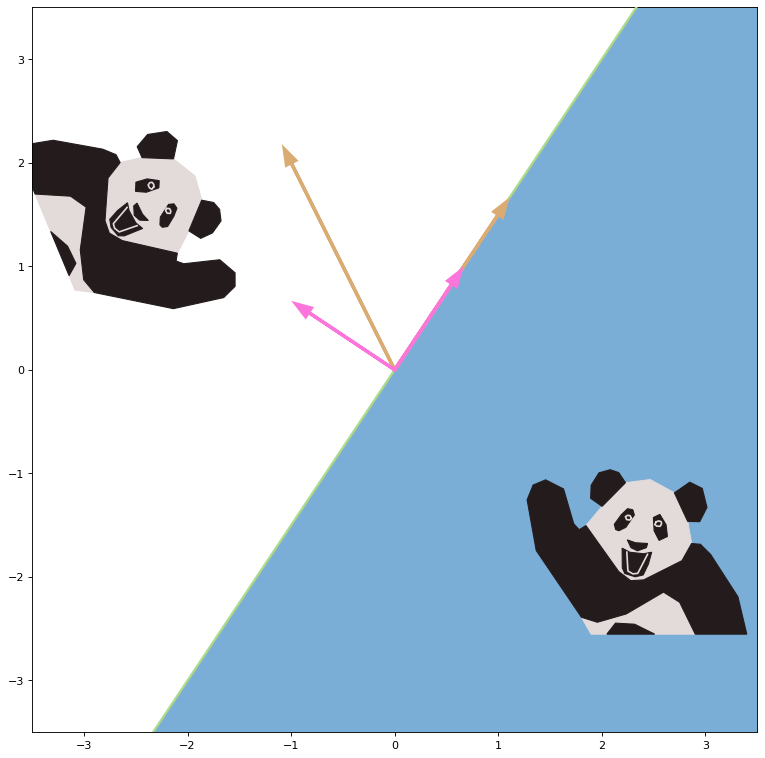

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

# This is the matrix of Bear's basis vectors. 
bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])
# This line uses your code to build a transformation matrix for us to use.
T = build_reflection_matrix(bearBasis)

# Bear is drawn as a set of polygons, the vertices of which are placed as a matrix list of column vectors.
# We have three of these non-square matrix lists: bear_white_fur, bear_black_fur, and bear_face.
# We'll make new lists of vertices by applying the T matrix you've calculated.
reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

# This next line runs a code to set up the graphics environment.
ax = draw_mirror(bearBasis)

# We'll first plot Bear, his white fur, his black fur, and his face.
ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

# Next we'll plot Bear's reflection.
ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);